In [33]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import doctest

#### Загружаем данные из файла json

In [34]:
with open('train_01.json', 'r') as myfile:
    data=myfile.read()
obj = json.loads(data)



In [35]:
obj

{'inside': [[0.7295200749361322, 0.7286337326606256],
  [0.826505923560258, 0.9403158114766519],
  [0.6023139955320228, 0.4890999051968531],
  [0.7924301535257385, 0.9724603339895345],
  [0.3739062132424882, 0.3807945141554343],
  [0.5213825315815278, 0.7011647516840395],
  [0.5799489554848042, 0.860210492806848],
  [0.4472712889659769, 0.23208680582951224],
  [0.8266928088733442, 0.9708616047497776],
  [0.2096090384196102, 0.07948946448504302],
  [0.33832612728389067, 0.4113630733104253],
  [0.68383264433507, 0.9003136248995234],
  [0.3974079484193441, 0.44643242592599985],
  [0.26193673674112883, 0.20727182114712916]],
 'outside': [[0.846590438950232, 0.12680486596335516],
  [0.11671041192819076, 0.8523469688748586],
  [0.8939436660435063, 0.20441969005621619],
  [0.196515524259539, 0.7563403480339516],
  [0.762462325724514, 0.17675381094088127],
  [0.8646206065391742, 0.4289513713302239],
  [0.7086382515784717, 0.1718070095596751],
  [0.07308462517167347, 0.7068687883532849],
  [0.7

In [36]:
df = pd.DataFrame(obj['inside'], columns = ['x', 'y'])
df['k'] = -1
for line in obj['outside']:
    df = df.append({'x': line[0], 'y': line[1], 'k': 1}, ignore_index=True)
    
    

In [37]:
df

,x,y,k
0,0.729520,0.728634,-1.0
1,0.826506,0.940316,-1.0
2,0.602314,0.489100,-1.0
3,0.792430,0.972460,-1.0
4,0.373906,0.380795,-1.0
5,0.521383,0.701165,-1.0
6,0.579949,0.860210,-1.0
7,0.447271,0.232087,-1.0
8,0.826693,0.970862,-1.0
9,0.209609,0.079489,-1.0


#### Выводим график с нашими данными (зеленый - "1" , красный -"-1")

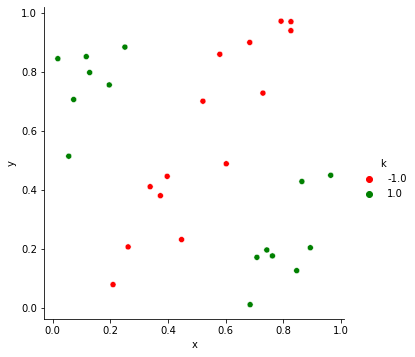

In [38]:
sns.pairplot(x_vars = ["x"],
    y_vars = ["y"],
    data = df,
    hue = "k",
    height = 5,
    palette = {-1:"red", 1:"green"}
)

In [39]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=35)
print(df_train.shape) 
print(df_test.shape)

(23, 3)
(6, 3)


In [40]:
w1 = np.random.sample(6)

x_train = np.array(df_train[['x', 'y']])
k_train = np.array(df_train['k'])
x_test = np.array(df_test[['x', 'y']])
k_test = np.array(df_test['k'])


In [41]:
print(len(w1), w1)

6 [0.55404087 0.56205625 0.61894161 0.67549702 0.72796851 0.65318846]


In [42]:
def get_x1(x):
    return np.array([1, x[0], x[1], x[0]**2, x[1]**2, x[0]*x[1]])


In [43]:
def predict(w, x, k):
    """
    >>> predict([0, 0, 0, 0, 0, 1], [0, 0, 0, -1, -1, -1], 1)
    0
    >>> predict([0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 1, 1], 1)
    1
    >>> predict([0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 1, 1], -1)
    0
    """
    activation = k*(np.dot(w, x))
    if activation >= 0: return 1
    else: return 0
    
    

In [44]:
def change_w(w, x, k):
    """
    >>> change_w(np.array([1, 1, 1, 1, 1, 1]), np.array([0, 0, 0, 1, 1, 1]), 1)
    array([0., 0., 0., 1., 1., 1.])
    """
    g = (np.dot(x, x) - k*np.dot(w, x))/np.dot(w-k*x, w-k*x)
    return g*w + k*(1-g)*x



In [45]:
def additional_element(w1):
    sig = np.array([[w1[3], w1[5]], [w1[5], w1[4]]])
    w, v = np.linalg.eig(sig)
# w - собственные числа входной матрицы
# v - собственные векторы входной матрицы
    eig = []
    for vector in v.T:
            eig.append([0,0,0, vector[0]**2, vector[1]**2, 2*vector[1]*vector[0]])
    eig = np.array(eig)
    return eig



In [46]:
def Kozinets_algorythm(df, x, k, w1):
   
    for j in range (0, 200):
        errors = 0
        for i in range (len(df)):
            x1 = get_x1(x[i])
            if predict(w1, x1, k[i])==0:
                errors = errors + 1
                w1 = change_w(w1, x1, k[i])
                
        for l in additional_element(w1):
            print(l)
            if predict(w1, l, 1)==0:
                errors = errors + 1
                w1 = change_w(w1, l, 1)

        print("Step=%d, Errors=%d" % (j, errors))
        if errors == 0: break
            
    print(w1)
    return w1


In [47]:
w1 = Kozinets_algorythm(df_train, x_train, k_train, w1)

[0.         0.         0.         0.64177707 0.35822293 0.95895623]
[ 0.          0.          0.          0.35822293  0.64177707 -0.95895623]
Step=0, Errors=9
[ 0.          0.          0.          0.61633483  0.38366517 -0.97255582]
[0.         0.         0.         0.38366517 0.61633483 0.97255582]
Step=1, Errors=10
[ 0.          0.          0.          0.54683069  0.45316931 -0.99560411]
[0.         0.         0.         0.45316931 0.54683069 0.99560411]
Step=2, Errors=9
[ 0.          0.          0.          0.52805133  0.47194867 -0.99842501]
[0.         0.         0.         0.47194867 0.52805133 0.99842501]
Step=3, Errors=4
[ 0.          0.          0.          0.53144892  0.46855108 -0.99801997]
[0.         0.         0.         0.46855108 0.53144892 0.99801997]
Step=4, Errors=6
[ 0.          0.          0.          0.52559673  0.47440327 -0.99868876]
[0.         0.         0.         0.47440327 0.52559673 0.99868876]
Step=5, Errors=5
[ 0.          0.          0.          0.53124

In [48]:
def get_plot (df, w):
    fig = plt.figure(figsize=(10,8))
    g = sns.pairplot(x_vars = ["x"],
        y_vars = ["y"],
        data = df,
        hue = "k",
        height = 5,
        palette = {-1:"red", 1:"green"}
    )

    x_plot = np.linspace(0, 1, 100)
    y_plot = np.linspace(0, 1, 100)

    x_plot,y_plot = np.meshgrid(x_plot,y_plot)

    Z = w1[0]+x_plot*w1[1] + y_plot*w1[2]+w1[3]*x_plot**2 + w1[4]*y_plot**2 + w1[5]*x_plot*y_plot

    plt.contour(x_plot,y_plot,(Z),[0])
    
    

<Figure size 720x576 with 0 Axes>

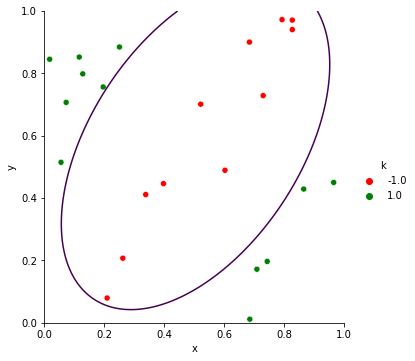

In [49]:
get_plot(df_train, w1)

<Figure size 720x576 with 0 Axes>

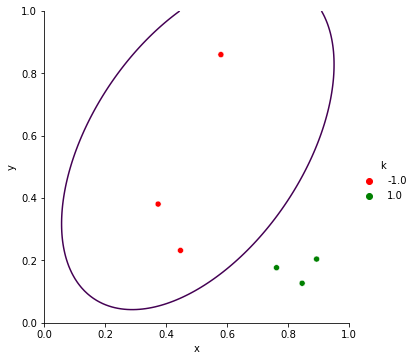

In [50]:
get_plot(df_test, w1)

In [51]:
doctest.testmod()

TestResults(failed=0, attempted=4)